# Análise de Dados - NBA Players

30 franquias, mais de 450 jogadores e mais de 80 jogos por time por temporada, essa é a liga de basquete mais famosa do mundo.

A *National Basketball Association*, não é apenas uma competição esportiva; é uma celebração global da habilidade atlética, da paixão pelo jogo e do espírito competitivo. Com suas raízes profundas no solo americano, a NBA transcende fronteiras, cativando fãs em todos os cantos do planeta com seu espetáculo eletrizante, estrelas lendárias e rivalidades intensas.

É um palco onde a destreza física se combina com a estratégia astuta, criando momentos épicos que ecoam na cultura popular e definem o padrão para o que significa ser um verdadeiro jogador do basquete.

**O objetivo aqui é através de uma <u>análise descritiva</u> colher o máximo de informações possíveis, com intuito de entender o perfil dos atletas que disputaram a temporada de 2015-2016, que é exatamente a temporada que vamos analisar.**

<left><img alt="Colaboratory logo" width="60%" src="https://th.bing.com/th/id/OIG.WWIPg__JocUW2eYKoAao?pid=ImgGn"></left>
<figcaption style="font-size: 14px; color: #888; text-align: center;">Imagem gerada através da AI do Bing (https://www.bing.com/images/create?FORM=GENILP)</figcaption>

O dataset traz jogadores que disputaram a temporada de 2015-2016. Você pode encontrar ele através deste link: [NBA Players](https://github.com/ericfruchi/fonte_de_dados/blob/master/nba.csv)

E para o melhor entendimento do que veremos aqui, apresento o dicionário com as variáveis que vamos trabalhar.

Dicionário de variáveis:

*   Name - Nome do jogador
*   Team - Time do jogador
*   Number - Número do jogador
*   Position - Posição do jogador
*   Age - Idade do jogador
*   Height - Altura do jogador
*   Weight - Peso do jogador
*   College - Universidade do jogador
*   Salary - Salário do jogador
*   Age_Group - Faixa etária* (coluna criada)


### Importar bibliotecas e ler arquivo



In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Vamos ler o dataset diretamente da pasta do Google drive e para isso precisamos importar a biblioteca necessária para esta tarefa.

In [2]:
# importando biblioteca do google drive
from google.colab import drive

# montar ambiente google drive no google colab
drive.mount('/content/drive')

Mounted at /content/drive


### Obtenção dos Dados

Você pode encontrar o dataset utilizado para essa análise clicando aqui (link)

In [3]:
# ler arquivo via caminho google drive
df = pd.read_csv("/content/drive/My Drive/Datasets/NBA Players/nba.csv")

## Explorando dos Dados
A ideia aqui é explorar todas as variáveis e linhas do DataFrame e entender no que vamos trabalhar.

In [4]:
# ler primeiras entradas do DataFrame
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


Aqui conseguimos ver as primeiras entradas do nosso DataFrame e já conseguimos visualizar problemas e como é sua estrutura.

Cada atleta representa uma linha do nosso DataFrame, informação importante.

In [5]:
# tamanho do DataFrame
df.shape

(458, 9)

Até aqui o DataFrame apresenta 458 linhas e 9 colunas. Se trata de um dataset pequeno, mas ainda assim é possível extrair insights interessantes.

Lembrando que o DataFrame ainda não foi tratado, esse número pode ser alterado para mais ou para menos dependendo do tratamento que for feito.

In [6]:
# visualizar as informações do Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


Identificamos algumas inconsistências nos tipos das variáveis, para o que queremos fazer elas não estão devidamente definidas.

O método `.info()` também traz a informação que não temos dados nulos. E aliado a isso, na próxima etapa vamos verificar se não temos dados ausentes. E para isso vamos usar o método `.isna()`.

In [7]:
# verificar se temos dados ausentes
df.isna().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

Oww, `College` apresenta 85 linhas com dados ausentes, já `Salary` apresenta 12, as demais variáveis apresentam apenas uma linha sem dados preenchidos. Vamos tratar todas essas variáveis em nossa próxima etapa, mas antes de finalizar nossa exploração dos dados, vamos analisar as variáceis numéricas do nosso DataFrame e para isso vamos usar o método `.describe()`.

**Verificação feita e identificamos que teremos muito trabalho, pois o DataFrame apresenta alguns problemas de tipos de variáveis e dados ausentes, são eles:**

* A `Age` se apresentano formato *float*, mas precisamos dela no formato int64*;

* Apesar de se tratar de número, a variável  `Number` é pouco relevante com relação a medidas, assim precisaremos dela no formato de texto;

* Além disso, também precisaremos remover (-) da variável `Height` e converte-la para  o formato float;

* Também precisaremos tratar os dados ausentes da variável `College` e `Salary`;

* E para finalizar, vamos criar uma **faixa etária** através da variável `Age`.

Tudo isso é baseado naquilo que queremos fazer, todo tratamento e limpeza de dados varia de projeto para projeto.

Como curiosidade, vamos buscar mais a fundo quais são os dados ausentes da variável `College`.

In [8]:
# identificar dados ausentes da variável College
df[df["College"].isna()]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90.0,PF,29.0,6-9,240.0,NaN,12000000.0
15,Bojan Bogdanovic,Brooklyn Nets,44.0,SG,27.0,6-8,216.0,NaN,3425510.0
20,Sergey Karasev,Brooklyn Nets,10.0,SG,22.0,6-7,208.0,NaN,1599840.0
32,Thanasis Antetokounmpo,New York Knicks,43.0,SF,23.0,6-7,205.0,NaN,30888.0
...,...,...,...,...,...,...,...,...,...
447,Rudy Gobert,Utah Jazz,27.0,C,23.0,7-1,245.0,NaN,1175880.0
450,Joe Ingles,Utah Jazz,2.0,SF,28.0,6-8,226.0,NaN,2050000.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


Conseguimos identificar que há uma grande chance dos dados ausentes da variável `College` ser de atletas formados em univerdades de fora dos Estados Unidos, mas não há uma garantia nisso, seria necessário uma análise mais profunda quanto a isso.

Vamos verificar agora os dados ausentes da variável `Salary`.

In [9]:
# identificar dados ausentes da variável College
df[df["Salary"].isna()]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
46,Elton Brand,Philadelphia 76ers,42.0,PF,37.0,6-9,254.0,Duke,NaN
171,Dahntay Jones,Cleveland Cavaliers,30.0,SG,35.0,6-6,225.0,Duke,NaN
264,Jordan Farmar,Memphis Grizzlies,4.0,PG,29.0,6-2,180.0,UCLA,NaN
269,Ray McCallum,Memphis Grizzlies,5.0,PG,24.0,6-3,190.0,Detroit,NaN
270,Xavier Munford,Memphis Grizzlies,14.0,PG,24.0,6-3,180.0,Rhode Island,NaN
273,Alex Stepheson,Memphis Grizzlies,35.0,PF,28.0,6-10,270.0,USC,NaN
350,Briante Weber,Miami Heat,12.0,PG,23.0,6-2,165.0,Virginia Commonwealth,NaN
353,Dorell Wright,Miami Heat,11.0,SF,30.0,6-9,205.0,NaN,NaN
397,Axel Toupane,Denver Nuggets,6.0,SG,23.0,6-7,210.0,NaN,NaN


Olhando assim, não parece ter algum padrão dos atletas que tem a variável `Salary` ausente.


Verificação executada, chegou o momento de colocar o mão na massa e realizar o tratamento necessários.

## Limpeza e Tratamento dos Dados
Talvez a mais importante das etapas de um notebook de análise de dados, não há análise de dados de boa qualidade antes dessa etapa. Nesta fase tratamos todas as falhas encontradas ou adicionamos tudo aquilo necessário para o projeto.

Na etapa anterior identificamos muitas coisas para que o DataFrame se adeque em tudo aquilo que desejamos, agora chegou o momento de executar toda a limpeza e tratamento dos dados.

Como boa prática, antes de começar nosso trabalho de limpeza e tratamento dos dados, vamos fazer uma cópia do nosso DataFrame usando o método `copy()` e o nosso DataFrame passará a se chamar `df_clean`.

In [10]:
# cópia do DataFrame
df_clean = df.copy()

### Remover e tratar dados ausentes

Iniciaremos o tratamento removendo os dados ausentes e para remover os dados ausentes vamos usar o método *.dropna()* e para substituir valores ausentes por outros valores, vamos usar o método *.fillna()*.

Dropar linhas é sempre algo particular, no nosso caso, vamos removelo-las por que assim julgamos o ideal, o número pequeno de linhas á serem removidas também ajudou muito para isso.

Ao invés de remover linhas, também possível preecher linhas com dados ausentes por outra informação, isto também é uma abordagem particular, cada projeto tem sua necessidade e o analista de dados juntamente com a parte interessada que devem escolher a decisão ideal.

In [11]:
# dropar linhas de variáveis que apresentam dados ausentes
#criar subset com as variáveis  que apresentaram dados ausentes
drop_var = ["Name", "Team", "Number", "Position", "Age", "Height", "Weight"]

# dropar linhas
df_clean.dropna(subset=drop_var, inplace=True)

In [12]:
# preencher dados ausentes da variável College para "Other"
df_clean["College"] = df_clean["College"].fillna("Other")

In [13]:
# preencher dados ausentes da variável Salary com o valor mediano da própria variável
df_clean["Salary"] = df_clean["Salary"].fillna(df_clean["Salary"].median())

# visualizar valor da mediana da variável Salary (para fins de curiosidade)
print(df_clean["Salary"].median())

2839073.0


### Converter tipos de variáveis

Aqui chegou a etapa de conveter as variáveis para que tenham o tipo ideal.

In [14]:
# convertendo a variável Age para int
df_clean["Age"] = df_clean["Age"].astype(int)

In [15]:
# convertendo a variável Number para string
df_clean["Number"] = df_clean["Number"].astype(str)

# Dividir a coluna Number com base no ponto decimal e pegar apenas a parte da esquerda
df_clean["Number"] = df_clean["Number"].str.split(".", 1).str[0]

<ipython-input-15-eba838f42669>:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_clean["Number"] = df_clean["Number"].str.split(".", 1).str[0]


In [16]:
# convertendo a variável Height para o tipo float
# convertendo a variável para um DataFrame
data = df_clean["Height"]
df_Height = pd.DataFrame(data)

# Remover o traço e converter para float
df_clean['Height'] = df_Height['Height'].str.replace('-', '.').astype(float)

Finalizando nosso tratamento dos dados, vamos criar também uma coluna de faixa etária o e entender qual o volume de atletas em cada grupo, assim teremos uma nova coluna em nosso DataFrame. E para executar essa tarefa vamos usar a função `pd.cut` do pandas.

In [17]:
# criar faixa etária
bins = [19, 21, 26, 31, 36, 41]  # intervalos desejados
rotulos = ['19-20', '21-25', '26-30', '31-35', '36-40']  # rótulos para os grupos
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=bins, labels=rotulos, right=False)

### Revisar limpeza e tratamento dos dados

Limpeza e tratamento executados, agora é momento de verificar se tudo ocorreu conforme planejamos.

In [18]:
# visualizar as informações do Dataframe (novamente)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 0 to 456
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       457 non-null    object  
 1   Team       457 non-null    object  
 2   Number     457 non-null    object  
 3   Position   457 non-null    object  
 4   Age        457 non-null    int64   
 5   Height     457 non-null    float64 
 6   Weight     457 non-null    float64 
 7   College    457 non-null    object  
 8   Salary     457 non-null    float64 
 9   Age_Group  457 non-null    category
dtypes: category(1), float64(3), int64(1), object(5)
memory usage: 36.4+ KB


Agora as variáveis apresentam o tipo ideal para o que escolhemos para o nosso projeto.

Abaixo as trago já no tipo de variável atualizado:

* Name - string
* Team - string
* Number - string
* Position - string
* Age - int64
* Height - float64
* Weight - float64
* College - string
* Salary - float64
* Age_Group - category


In [19]:
# verificar se há dados ausentes
df_clean.isna().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College      0
Salary       0
Age_Group    0
dtype: int64

Visualizamos que já não temos mais dados ausentes em nosso DataFrame. Fizemos um bom trabalho!

In [20]:
# tamanho do DataFrame
df_clean.shape

(457, 10)

Após a limpeza e tratamento dos dados, perdemos apenas uma linha do nosso DataFrame, mas ganhamos uma nova coluna.

Agora temos 457 linhas e 10 colunas.

Por fim, vamos visualizar as primeiras entradas do nosso DataFrame.

In [21]:
df_clean.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_Group
0,Avery Bradley,Boston Celtics,0,PG,25,6.2,180.0,Texas,7730337.0,21-25
1,Jae Crowder,Boston Celtics,99,SF,25,6.6,235.0,Marquette,6796117.0,21-25
2,John Holland,Boston Celtics,30,SG,27,6.5,205.0,Boston University,2839073.0,26-30
3,R.J. Hunter,Boston Celtics,28,SG,22,6.5,185.0,Georgia State,1148640.0,21-25
4,Jonas Jerebko,Boston Celtics,8,PF,29,6.1,231.0,Other,5000000.0,26-30


Já com os nossos tipos de variáveis corrigidos, vamos visualizar as principais medidas de nossas variáveis numéricas, usando o método `.describe()`.

In [22]:
# visualizar medidas das variávies numéricas
df_clean.describe()

,Age,Height,Weight,Salary
count,457.000000,457.000000,457.000000,4.570000e+02
mean,26.938731,6.517133,221.522976,4.794457e+06
std,4.404016,0.352205,26.368343,5.174920e+06
min,19.000000,5.110000,161.000000,3.088800e+04
25%,24.000000,6.110000,200.000000,1.100602e+06
50%,26.000000,6.600000,220.000000,2.839073e+06
75%,30.000000,6.800000,240.000000,6.331404e+06
max,40.000000,7.300000,307.000000,2.500000e+07


Aqui já conseguimos ter números de contagem, medidas de mínimo, máximo, média, mediana, desvio padrão e quartis. Isto já nos dá insights de como trabalhar nossa análise referente as medidas numéricas.

Outra coisa que nos ajuda muito referente a distribuição de dados numéricos, são os histogramas.

Ele organiza dados em intervalos (chamados de "classes") e mostra a frequência com que os dados caem em cada intervalo. O eixo horizontal do histograma representa as classes (ou intervalos), enquanto o eixo vertical representa a frequência com que os dados caem em cada classe.

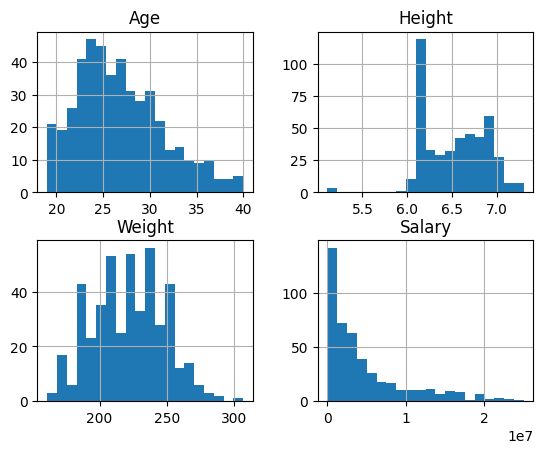

In [23]:
# plotar histograma das medidas numéricas
df_clean.hist(bins=20)
plt.show()

Aqui temos não só números, mas representações gráficas de nossas medidas e conseguimos ver como elas estão distribuídas.

 * Conseguimos visualizar que a variável `Age` (idade)tem como maioria atletas de 23 a 27 anos;
 * Já a variável `Height` (altura) exibe que tem um alto volume de atletas do tamanho 6.2;
 * Falando da coluna `Weight` (peso), essa apresenta medidas bem distruibuídas entre os atletas;
 * E por fim, a variável `Salary` exibi que a maior parte dos atletas tem um salário baixo e atletas de salários milionários são para a minoria dos deles.

Foi trabalhoso, mas é um processo necessário e importantissímo para todo e qualquer projeto de análise de dados.

DataFrame devidamente limpado e tratado, agora vamos ao momento mais esperado, analisar os dados. Vamos lá!

## Análise dos Dados + Visualização dos Dados
Não menos importante que a etapa anterior, aqui é momento de extrair os mais variados insights, momento de responder problemas ou perguntas levantadas ao analista de dados. Com intuito de fazer uma análise descritiva, vamos buscar o maior número de informações possíveis através da análise .

Além da análise, aqui também traremos as visualizações dos principais insights que encontraremos, para isso vamos usar diferentes bibliotecas, me acompanhe e verá tudo isso a seguir.


Começando por informções mais básicas, vamos buscar o número de franquias e de jogadores.

In [24]:
# número de times
df_clean["Team"].nunique()

30

A NBA tem 30 franquias, 29 dos Estados Unidos e uma do Canadá.

In [25]:
df_clean["Age"].mean().round(0)

27.0

A média de idade da liga na temporada de 2015-2016 é de 27 anos.

In [26]:
# número total de jogadores
df_clean["Name"].nunique()

457

Nosso DataFrame traz 457 jogadores distruibuídos entre essas 30 franquias. Vamos ver esses números distruibuídos entre os times? Antes de fazer isso, vamos identificar qual é a média de jogadores por equipe

In [27]:
# média de atletas por time
media_atletas = df_clean["Name"].nunique() / df_clean["Team"].nunique()

# arredondar valores
media_atletas = round(media_atletas, 0)

print(media_atletas)


15.0


Identificamos que a média de jogadores por equipe na temporada 2015-2016 é 15. Agora vamos calcular onde exatamente onde esses 457 jogadores estão distruibuídos.

In [28]:
# número de jogadores por franquia
df_clean.groupby("Team")["Name"].size().sort_values(ascending=False)

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
New York Knicks           16
Milwaukee Bucks           16
Atlanta Hawks             15
Utah Jazz                 15
Toronto Raptors           15
San Antonio Spurs         15
Sacramento Kings          15
Portland Trail Blazers    15
Phoenix Suns              15
Philadelphia 76ers        15
Oklahoma City Thunder     15
Boston Celtics            15
Miami Heat                15
Los Angeles Lakers        15
Los Angeles Clippers      15
Indiana Pacers            15
Houston Rockets           15
Golden State Warriors     15
Detroit Pistons           15
Denver Nuggets            15
Dallas Mavericks          15
Cleveland Cavaliers       15
Chicago Bulls             15
Charlotte Hornets         15
Brooklyn Nets             15
Washington Wizards        15
Minnesota Timberwolves    14
Orlando Magic             14
Name: Name, dtype: int64

Os Pelicans foi a franquia que mais teve atletas na temporada 2015-2016, a franquia apresentou 19 atletas na temporada, 4 jogadores a mais do que a média das franquias. Em seguida vem o Memphis Grizzlies com 18, na sequência os Knicks e o Milwaukee Bucks com 16, depois deles, 24 times apresentaram 15 atletas para temporada, por fim, aparecem os Timberwolves e Orlando Magic com 14.


Agora vamos visualizar todos esses números de atletas por franquia através de um gráfico waffle.

...

In [29]:
# instalando biblioteca pywaffle
!pip install pywaffle -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 28.6 MB/s eta 0:00:00


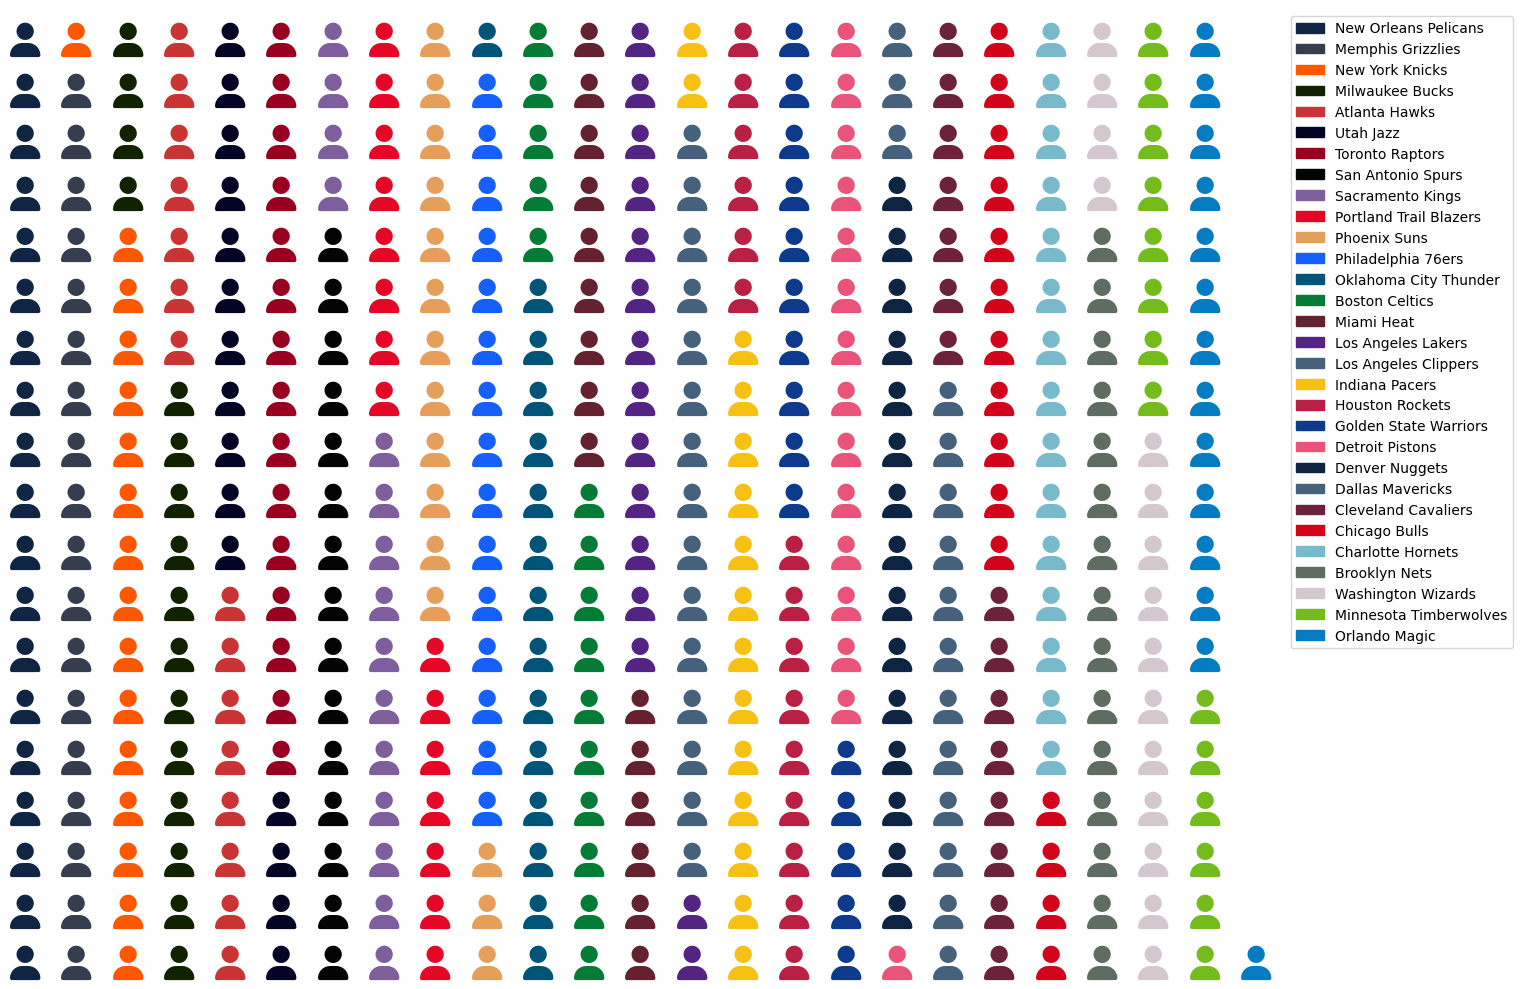

In [30]:
# waffle chart - número de jogadores por franquia
from pywaffle import Waffle

data = df_clean.groupby("Team")["Name"].size().sort_values(ascending=False)

# Criar um DataFrame com os dados
df_waffle = pd.DataFrame(data).reset_index()
df_waffle.columns = ['Team', 'Count']

# Criar um gráfico de waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=19,  # Número de linhas
    values=df_waffle['Count'],  # Valores
    colors=["#102444", "#353D4E", "#fd5800", "#112200", "#ca3435", "#040524", "#990020",
            "#040404", "#7f5e9d", "#e60626", "#e69f5a", "#1560fb", "#005477", "#057c35",
            "#64212f", "#542483","#46617b", "#f7c114", "#b92044", "#0d3a8c", "#eb547a",
            "#0e2443", "#46617b", "#6d223b", "#d2041c", "#78bacc", "#5e6c62", "#d4c7cd",
            "#74bc1c", "#047cc4"], # Cores
    icons='user',
    labels=list(df_waffle['Team']),  # Rótulos para cada quadrado
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(15, 10)  # Tamanho da figura
)

plt.show()

Mais de 450 atletas, esses distruibuidos por 30 equipes , tudo isso é muito legal, mas cada atleta além suas habilidades, tem suas caracterísicas. Assim, a partir de agora vamos analisar esses números, começando nossa análise por quem é o atleta mais novo e o mais velho, quantos anos tem? Onde jogam? Qual posição? E muito mais...

Aqui vamos usar o método `.min()` e `.max()`.

In [31]:
# atleta mais jovem
df_clean.groupby("Name")["Age"].min().sort_values(ascending=True).head(1)

Name
Rashad Vaughn    19
Name: Age, dtype: int64

In [32]:
# detalhes do atleta mais jovem
df_clean.loc[df_clean["Name"] == "Rashad Vaughn"]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_Group
226,Rashad Vaughn,Milwaukee Bucks,20,SG,19,6.6,202.0,UNLV,1733040.0,19-20


O novato Rashad Vaughn, fazia sua temporada de estréia como atleta da NBA com apenas 19 anos, jogando pelo Milwaukee Bucks.

In [33]:
# atleta mais velho
df_clean.groupby("Name")["Age"].max().sort_values(ascending=False).head(1)

Name
Andre Miller    40
Name: Age, dtype: int64

In [34]:
# detalhes do atleta mais velho
df_clean.loc[df_clean["Name"] == "Andre Miller"]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_Group
304,Andre Miller,San Antonio Spurs,24,PG,40,6.3,200.0,Utah,250750.0,36-40


O veterano Andre Miller, fazia sua última temporada como atleta da NBA com 40 anos de idade, jogando pelo San Antonio Spurs.

Novatos, experientes, veteranos... A NBA tem atletas de várias idades e é isso que vamos ver na nossa próxma etapa. Lembra da coluna `Age_Group` que criamos na etapa de tratamento de dados? Pois é, é ela que vamos usar agora.


In [35]:
# contando atletas por faixa etária freq relativa
faixaetaria = df_clean["Age_Group"].value_counts().sort_index()

# calcular freq. relativa
frequencia_relativa = faixaetaria / len(df_clean)

# arredondar para duas casas decimais
frequencia_relativa = (frequencia_relativa * 100).round(1)

# exibir os resultador
resultado_df = pd.DataFrame({
    "Núm de Atletas": faixaetaria,
    "Freq. Relativa": frequencia_relativa.astype(str) + "%"
})

print(resultado_df)

       Núm de Atletas Freq. Relativa
19-20              21           4.6%
21-25             178          38.9%
26-30             167          36.5%
31-35              68          14.9%
36-40              23           5.0%


Aqui, eu trouxe além dos números absolutos, também trouxe a frequência relativa.

E conseguimos visualizar que um pouco mais de 75% dos atletas da temporada 2015-2016 tinham entre 21 a 30 anos. Trago um gráfico abaixo com os números absolutos para visualizarmos isso.

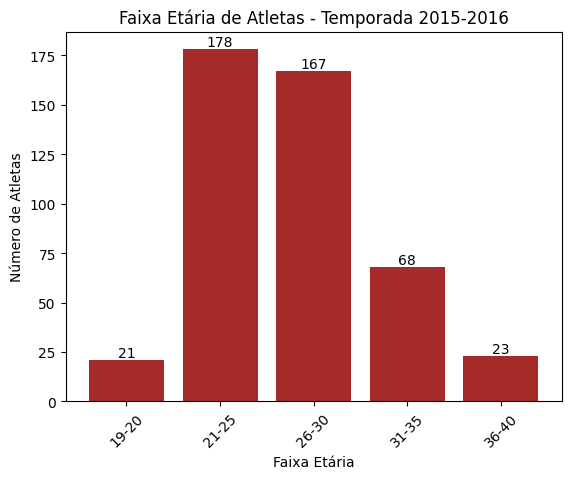

In [36]:
# bar chart - atletas por faixa etária
faixa_etaria = df_clean["Age_Group"].value_counts().sort_index()
faixa_etaria.plot(kind="bar", color="Brown", rot=45, width=0.8)

# Adicionar rótulos de dados
for i, valor in enumerate(faixa_etaria):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')

plt.title("Faixa Etária de Atletas - Temporada 2015-2016")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Atletas")

plt.show()

Já que o assunto é idade, vamos ver agora qual é média de idade por franquia da temporada 2015-1016. Faremos isso plotando um gráfico de barras.

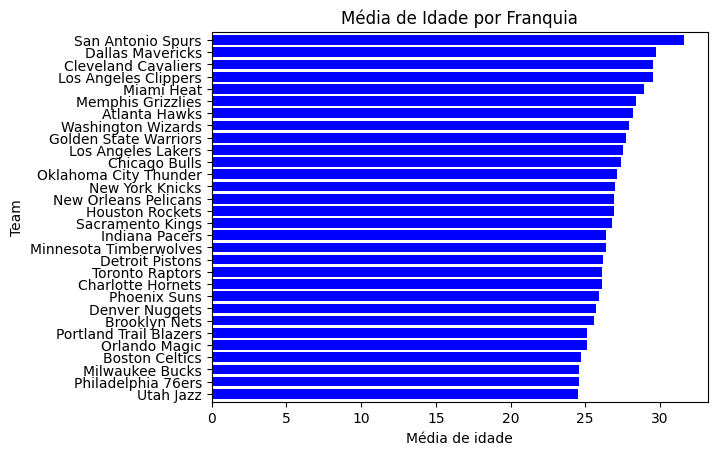

In [37]:
# bar chart - média de idade por franquia
df_clean.groupby("Team")["Age"].mean().round(1).sort_values(ascending=True).plot(kind="barh", color="blue", width=0.8)
plt.title("Média de Idade por Franquia")
plt.xlabel("Média de idade")

plt.show()

A franquia San Antonio Spurs liderou a liga na temporada 2015-2016 quando o assunto é média idade, a franquia ultrapassou a média de 30 anos de idade naquela temporda. O pódio é completado por Dallas Mavericks e Cleveland Cavaliers respectivamente.

Aproveitando que estamos calculando a média de idade por franquia, vamos fazer isso agora para altura e peso.

*Lembrando que as variáveis altura(`Height`) está em polegadas e peso(`Weight`) em libras*.

In [38]:
# média de altura por franquia
df_clean.groupby("Team")["Height"].mean().round(1).sort_values(ascending=False)

Team
Toronto Raptors           6.7
Los Angeles Lakers        6.7
Boston Celtics            6.6
Utah Jazz                 6.6
Charlotte Hornets         6.6
Portland Trail Blazers    6.6
Detroit Pistons           6.6
Orlando Magic             6.6
New York Knicks           6.6
Atlanta Hawks             6.5
San Antonio Spurs         6.5
Sacramento Kings          6.5
Phoenix Suns              6.5
Philadelphia 76ers        6.5
New Orleans Pelicans      6.5
Miami Heat                6.5
Los Angeles Clippers      6.5
Houston Rockets           6.5
Golden State Warriors     6.5
Denver Nuggets            6.5
Dallas Mavericks          6.5
Cleveland Cavaliers       6.5
Chicago Bulls             6.5
Washington Wizards        6.5
Milwaukee Bucks           6.4
Minnesota Timberwolves    6.4
Memphis Grizzlies         6.4
Oklahoma City Thunder     6.4
Indiana Pacers            6.4
Brooklyn Nets             6.3
Name: Height, dtype: float64

Raptors e Lakers foram as franquias mais altas na temporada que estamos analisando, apresentaram uma média de 6.7 polegadas de média, fechamos o terceiro lugar com o Boston Celtics com uma média de 6.6 polegadas.

In [39]:
# média de peso por franquia
df_clean.groupby("Team")["Weight"].mean().round(1).sort_values(ascending=False)

Team
Oklahoma City Thunder     229.4
Minnesota Timberwolves    228.6
Cleveland Cavaliers       227.9
Los Angeles Lakers        227.1
Dallas Mavericks          227.0
Golden State Warriors     224.6
Milwaukee Bucks           224.1
San Antonio Spurs         223.9
New York Knicks           223.6
Indiana Pacers            222.3
Detroit Pistons           222.2
Philadelphia 76ers        222.1
Toronto Raptors           221.8
Sacramento Kings          221.3
Atlanta Hawks             221.3
New Orleans Pelicans      221.0
Charlotte Hornets         220.4
Houston Rockets           220.3
Utah Jazz                 220.0
Los Angeles Clippers      219.7
Boston Celtics            219.5
Washington Wizards        219.0
Chicago Bulls             218.9
Phoenix Suns              218.6
Portland Trail Blazers    218.6
Miami Heat                218.4
Memphis Grizzlies         218.0
Denver Nuggets            217.5
Brooklyn Nets             215.6
Orlando Magic             213.4
Name: Weight, dtype: float64

Já falando sobre peso em libras, quem esteve na primeira posição em média na temporada 2015-2016 foi o Oklahoma City Tunder, com uma média de 229.4 libras. Timberwolves e Cavaliers aparecem na sequência, com o time de Minnesota tendo uma média de 228.6 libras e o time de Cleveland com uma média de 227.9 libras.

Analisando as duas variáveis vemos que as franquias não se repetem falando sobre primeiras colocações. Será que há uma correlação na altura e peso dos atletas na NBA? Digo, será que uma atleta mais alto, mas pesado ele é? Parece ser uma boa hipótese, mas vamos verificar isso através de cálculos.

A seguir, vamos usar o método `.corr()`. O método `.corr()` na biblioteca pandas, por padrão, calcula a correlação de Pearson entre as colunas de um DataFrame. A correlação de Pearson é uma medida estatística que avalia a relação linear entre duas variáveis contínuas. Ela varia de -1 a 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e 0 indica nenhuma correlação linear.

In [40]:
# correlação entre altura e peso
df_corr = df_clean["Height"].corr(df["Weight"]).round(2)
print(df_corr)

0.29


Uma correlação 0.29 entre duas variáveis, geralmente é considerada uma correlação fraca, sugere que há uma relação positiva entre altura e peso, mas não é muito forte.

Ciente disso, vamos criar um scatter plot, gráfico mais indicado para visualizar correlações entre duas variávies.

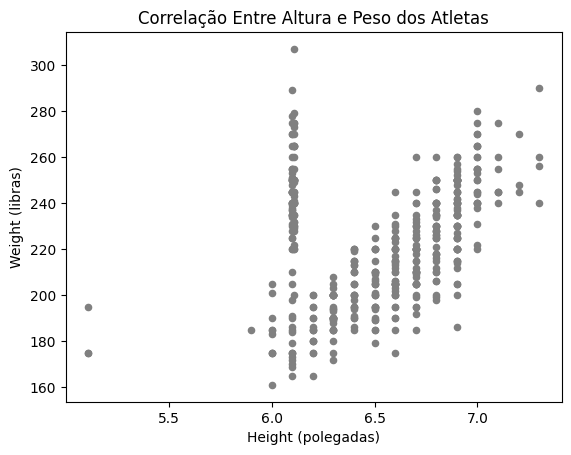

In [41]:
# gráfico de dispersão - correlação entre altura e peso
df_clean.plot(x='Height', y='Weight', kind="scatter", color="gray")
plt.title("Correlação Entre Altura e Peso dos Atletas")
plt.xlabel("Height (polegadas)")
plt.ylabel("Weight (libras)")

plt.show()

Apesar de fraca, claramente é possível visualizar uma correlação positiva entre altura e peso dos jogadores da temporada de 2015-2016. Há uma fraca tendência de quando o atleta for mais alto mais pesado ele provavelmente será.

Continuando falando sobre correlações, vamos identificar se há correlação entre todas as medidas do nosso DataFrame através de um heatmap.

In [42]:
# correlação de medidas do DataFrame
df_clean_corr = df_clean.corr()
print(df_clean_corr)

             Age    Height    Weight    Salary
Age     1.000000 -0.053471  0.087183  0.208582
Height -0.053471  1.000000  0.293000 -0.033389
Weight  0.087183  0.293000  1.000000  0.138621
Salary  0.208582 -0.033389  0.138621  1.000000


<ipython-input-42-58f0060c8bf2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean_corr = df_clean.corr()


Para criar um heatmap vamos usar a biblioteca
seaborn.

Seaborn é uma biblioteca de visualização de dados em Python baseada no Matplotlib. Ela fornece uma interface de alto nível para criar gráficos estatísticos atraentes e informativos. Projetada para trabalhar em conjunto com estruturas de dados do tipo DataFrame do pandas, a Seaborn simplifica a criação de visualizações estatísticas, oferecendo funções que lidam automaticamente com detalhes de formatação e estilo. Comumente usada para explorar e comunicar padrões em dados complexos, a Seaborn é uma ferramenta valiosa em análise de dados e ciência de dados.

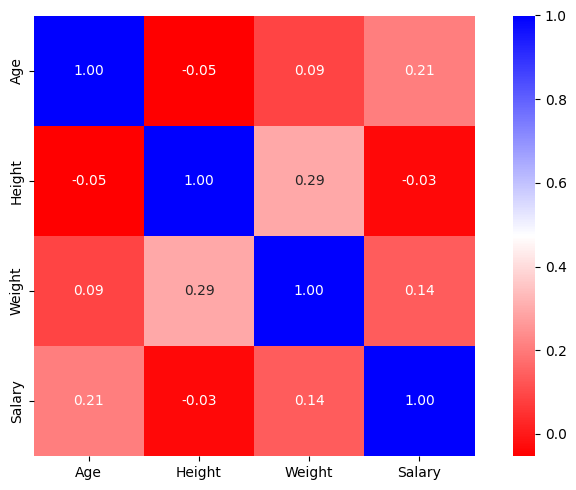

In [43]:
# importando biblioteca seaborn
import seaborn as sns

# tamanho da figura
fig, ax = plt.subplots(figsize=(8, 5))

# plotando heatmap
sns.heatmap(df_clean_corr, fmt='.2f', square=True, cmap='bwr_r', linecolor='white', vmax=1.0, annot=True);

plt.tight_layout()


Nosso maior ponto de correlação do heatmap é exatamente entre altura e peso, com `0.29`, que como já em etapas anteriores, apesar de positiva é uma correlação fraca.

Outra correlação interessante que é possível visualizar no heatmap que  apesar de ainda mais fraca mas positiva, é a correlação entre salário e idade com `0.21`. Essa correlação apresenta que atletas mais velhos ganham mais que atletas mais jovens respectivamente.

Vamos ver essa correlação através de um scatter plot.

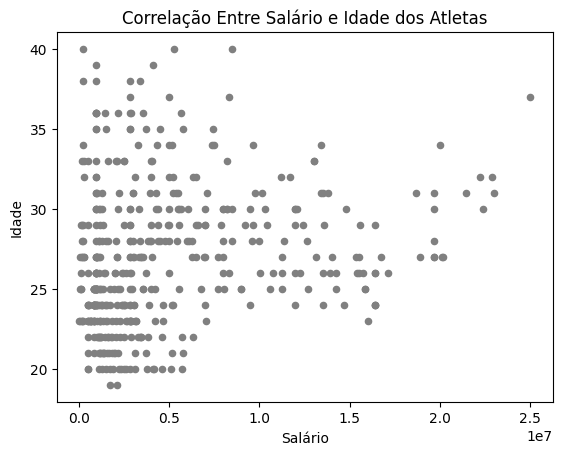

In [44]:
# gráfico de dispersão - correlação entre salário e idade
df_clean.plot(x="Salary", y="Age", kind="scatter", color="gray")
plt.title("Correlação Entre Salário e Idade dos Atletas")
plt.xlabel("Salário")
plt.ylabel("Idade")

plt.show()

Podemos ver uma leve inclinação positiva e muitos pontos espalhados pelo gráfico. Apesar de fazer sentido que o atleta quanto mais velho mais ele ganha, há também alguns atletas veteranos ganhando baixos salários na temporada de 2015-2016.

Salário é exatamente que vamos falar agora, qual seria os atletas mais ou menos pagos pela liga? Franquias com maiores e menores média de salário? E outra, qual a posição recebe o maior salário da NBA? Muitas perguntas e muito trabalho pela frente.

Vamos começar somando do todo o salário da temporada.

In [45]:
# total de salários
df_clean["Salary"].sum()

2191066914.0

UAU! muita grana. A liga gastou em salários na temporada 2015-2016: Mais de 2 bilhões.

A NBA realmente é uma liga bilionária, ciente disso, agora vamos ver todos esses salários distribuídos por franquias, jogadores e sim, por posição.

Antes de começar nossas análise, gostaria de informar que para identificar a medida central do conjunto de dados com relação a variável salário, irei utilizar a mediana ao invés da média. Medida apropriada para evitar que altos ou baixos números, no nosso caso o salário altere muito nosso cálculo para encontrar uma medida central.

Em uma análise prévia, identifiquei essa ser a melhor medida para essa variável. Para isso então usaremos o método `.median()`.

In [46]:
# mediana de salário por franquia (TOP 10)
df_clean.groupby("Team")["Salary"].median().round(2).sort_values(ascending=False).head(10)

Team
Cleveland Cavaliers      4950000.0
Charlotte Hornets        4204200.0
Washington Wizards       4000000.0
Indiana Pacers           4000000.0
Orlando Magic            3956580.0
Dallas Mavericks         3950313.0
Golden State Warriors    3815000.0
Oklahoma City Thunder    3344000.0
Memphis Grizzlies        3190786.5
Sacramento Kings         3156600.0
Name: Salary, dtype: float64

Os Cavaliers tinham o topo dos times que mais gastavam em média de salários para atletas naquela temporada, o time de Clevaland gastou quase 5 milhões em média. Na sequência vem os Hornets e os Wizards com 4 milhões e duzentos e 4 milhões respectivamente.

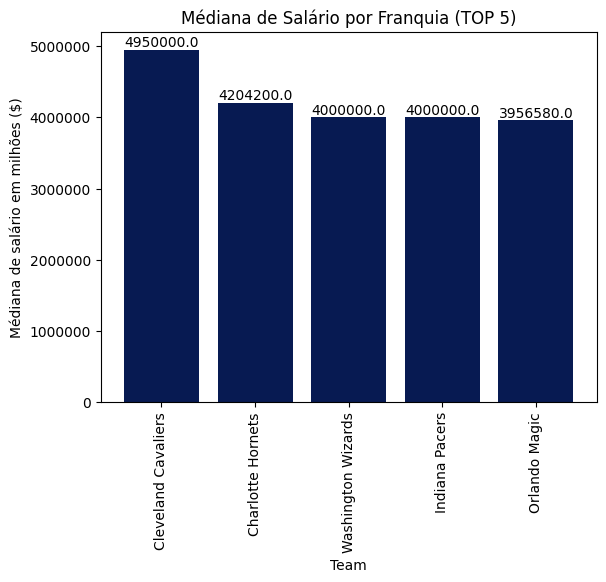

In [47]:
# bar chart - mediana de salário por franquia (TOP 5)
top_salary_team = df_clean.groupby("Team")["Salary"].median().round(2).sort_values(ascending=False).head(5)
top_salary_team.plot(kind="bar", color="#071a52", width=0.8)
plt.title("Médiana de Salário por Franquia (TOP 5)")
plt.ylabel("Médiana de salário em milhões ($)")

# adicionar rótulos de dados
for i, valor in enumerate(top_salary_team):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')

# Ajustar a formatação dos rótulos do eixo x
plt.ticklabel_format(style="plain", axis="y")

plt.show()

Aqui é o mesmo cálculo executado acima só que em um gráfico.


In [48]:
# atletas por salário
df_clean.groupby("Name")["Salary"].max().sort_values(ascending=False)

Name
Kobe Bryant               25000000.0
LeBron James              22970500.0
Carmelo Anthony           22875000.0
Dwight Howard             22359364.0
Chris Bosh                22192730.0
                             ...    
Jordan McRae                111196.0
Alan Williams                83397.0
Phil Pressey                 55722.0
Orlando Johnson              55722.0
Thanasis Antetokounmpo       30888.0
Name: Salary, Length: 457, dtype: float64

Aqui conseguimos visualizar o topo dos atletas mais bem pagos da NBA, mas para melhor ver isso, vamos criar um gráficos de barras.

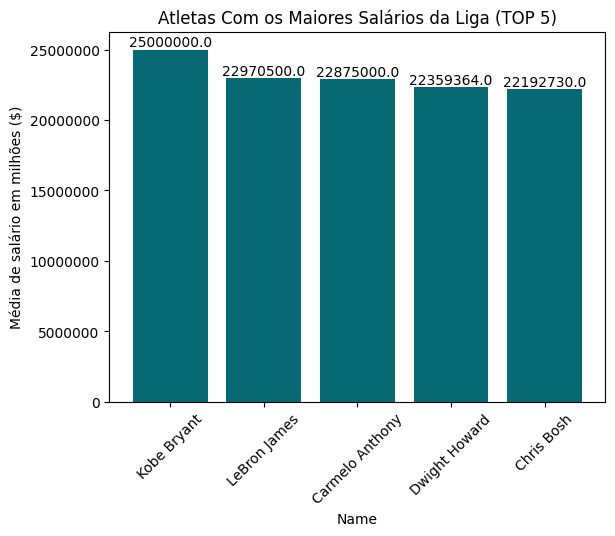

In [49]:
# bar chart - atletas com o maior salário (Top 5)
top_salary_at = df_clean.groupby("Name")["Salary"].max().sort_values(ascending=False).head(5)
top_salary_at.plot(kind="bar", color="#086972", rot=45, width=0.8)
plt.title("Atletas Com os Maiores Salários da Liga (TOP 5)")
plt.ylabel("Média de salário em milhões ($)")

# adicionar rótulos de dados
for i, valor in enumerate(top_salary_at):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')

# Ajustar a formatação dos rótulos do eixo y
plt.ticklabel_format(style="plain", axis="y")

plt.show()

Ai você tá falando da elite! Koke Bryant, LeBron James, Carmelo Anthony, Dwight Howard e Chris Bosh dominaram o topo de salários mais bem pagos da NBA em 2015-2016.

Kobe bateu 25 milhões de dólares em salários naquela temporada, LeBron vem na sequência com números próximos a 23 milhões, um pouco abaixo disso vem Carmelo com 22 milhões e 800 mil dólares, pra fechar o topo dos 5 melhores vem sHoward e Bosh também dentro da casa de 22 milhões.

Vamos saber mais desses 5 craques da bola laranja? Onde jogam? Quantos anos tem? Qual posição e mais...

In [50]:
# top 5 em salários
df_clean.nlargest(5, "Salary")

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Age_Group
109,Kobe Bryant,Los Angeles Lakers,24,SF,37,6.60,212.0,Other,25000000.0,36-40
169,LeBron James,Cleveland Cavaliers,23,SF,31,6.80,250.0,Other,22970500.0,31-35
33,Carmelo Anthony,New York Knicks,7,SF,32,6.80,240.0,Syracuse,22875000.0,31-35
251,Dwight Howard,Houston Rockets,12,C,30,6.11,265.0,Other,22359364.0,26-30
339,Chris Bosh,Miami Heat,1,PF,32,6.11,235.0,Georgia Tech,22192730.0,31-35


Acima todos os detalhes dos atletas mais bem pagos pela liga, e fica o insight que 3 dos 5 são SF - Small Foward, Ala em português. São eles: Kobe Bryan, LeBron James e Carmelo Anthony. E todos já apresentam ter mais de 30 anos.

Já estamos falando sobre posição, vamos ver como é a distribuição de salários entre elas.

In [51]:
# mediana de salário por posição
df_clean.groupby("Position")["Salary"].median().round(2).sort_values(ascending=False)

Position
C     3811060.0
PG    2927470.0
PF    2877470.0
SG    2394102.5
SF    2041080.0
Name: Salary, dtype: float64

* A posição **center (pivô)** tem a média de salários, a média se apróxima dos  4 milhões de dólares, se qualificando a mais bem paga com relação as posições;

* Depois vem **point guard (armador)** próximo dos 3 milhões em média;

* Na sequência temos **point foward (ala-pivô)** com 2 milhões e 800 mil em média

* E nas duas últimas posições aparecem **shooting guard (ala-armador)** e **small foward (ala)** com 2 milhões 239 e com um mais de 2 milhões respectivamente.

Muitos números, e novamente para melhor visualizarmos as informações, vamos plotar um gráfico de barras.

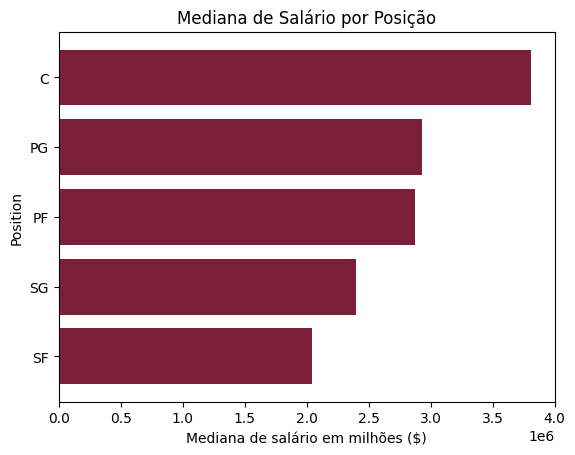

In [52]:
# mediana de salário por posição
salary_per_position = df_clean.groupby("Position")["Salary"].median().round().sort_values(ascending=True)
salary_per_position.plot(kind="barh", color="#7c203a", width=0.8)

# Adicionar rótulos de dados
#for i, valor in enumerate(salary_per_position):
#    plt.text(valor + 0.1, i, str(valor), ha='left', va='center')

plt.title("Mediana de Salário por Posição")
plt.xlabel("Mediana de salário em milhões ($)")

plt.show()

O gráfico apresenta o que vimos acima, a posição de pivô (center) é destacada a que mais ganha em salários.

Já entendemos como as posições são valorizadas com relação aos salários, mas como temos mais de 450 atletas, vamos ver como eles são distribuídos entre as posições. Será que há demanda maior em determinadas posições?

In [53]:
# número de jogadores por posição
atleta_por_posicao  = df_clean.groupby("Position")["Name"].size().sort_values(ascending=False)

# calcular a frequência relativa
freq_relativa = atleta_por_posicao / len(df_clean)

# arredondar para duas casas decimais
freq_relativa = (freq_relativa * 100).round(1)

# exibir os resultados
result_df = pd.DataFrame({
    'Núm. de Atletas': atleta_por_posicao,
    'Freq. Relativa (%)': freq_relativa.astype(str) + "%"
})

print(result_df)

          Núm. de Atletas Freq. Relativa (%)
Position                                    
SG                    102              22.3%
PF                    100              21.9%
PG                     92              20.1%
SF                     85              18.6%
C                      78              17.1%


Olhando nossa frequência relativa conseguimos ver que a distruibuição de jogadores por posição é bem distruibuída.

Abaixo apresento os números:

* SG - Shooting Guard (ala-armador) - 22.3%
* PF - Power Forward (ala-pivô) - 21.9%
* PG - Point Guard (armador) - 20.1%
* SF - Small Forward (ala) - 18.6%
* C - Center (pivô) - 17.1%

Center (pivô) que em média tem o salário mais alto, é a posição que menos atleta tem na liga, apresenta 17.1% dos atletas, provavelmente até por isso apresenta a maior medida de salário.

Os elencos são recheados de shooting guard (ala-armador) é o líder de atletas por posição, apresentam números de 22.3%, em seguida vem os power fowards (ala-pivô) e o point guard (armador) com 21.9% e 20.1% respectivamente.

A posição de Kobe Bryant e LeBron James, small foward (ala) é apenas a 4ª colocada das 5 posições, apenas 18.6% joga nessa posição.

Seguindo com nossa análise, sabemos que todo atleta tem sua origem e essa é no College (universidade), com isso em mente, vamos identificar qual é a universidade que mais cedeu atletas para a NBA na temporada 2015-2016. Além de números absolutos, aqui também vamos trazer a frequência relativa desses números.

In [55]:
# números de atletas por College
atletas_college = df_clean.groupby("College").size().sort_values(ascending=False)

# calcular freq. relativa
freq__relativa = atletas_college / len(df_clean)

# arredondar para 1 casa decimal
freq__relativa = (freq__relativa * 100).round(1)

# exibir resultados
resultado_df = pd.DataFrame({
     "Freq. Relativa": freq__relativa.astype(str) + "%"
})

print(resultado_df)

               Freq. Relativa
College                      
Other                   18.4%
Kentucky                 4.8%
Duke                     4.4%
Kansas                   3.9%
North Carolina           3.5%
...                       ...
Kansas State             0.2%
Iowa State               0.2%
Iowa                     0.2%
IUPUI                    0.2%
Xavier                   0.2%

[119 rows x 1 columns]


18.4% dos atletas vieram de universidades que não foram informadas, em uma análise prévia, identificamos que esses atletas são de fora dos Estados Unidos, nos dando o entendimento que a liga recebe muitos atletas estrangeiros.

Para fechar o top 5, apresento as 4 universidades americanas que mais disponibilizaram atletas para NBA na temporada 2015-2016:
* Kentucky - 4.8%
* Duke - 4.4%
* Kansas - 3.9%
* North Carolina - 3.5%


Frequência relativa apresentada, chegou o momento de visualizar os números absolutos das 10 primeiras universidades em um gráfico de barras.

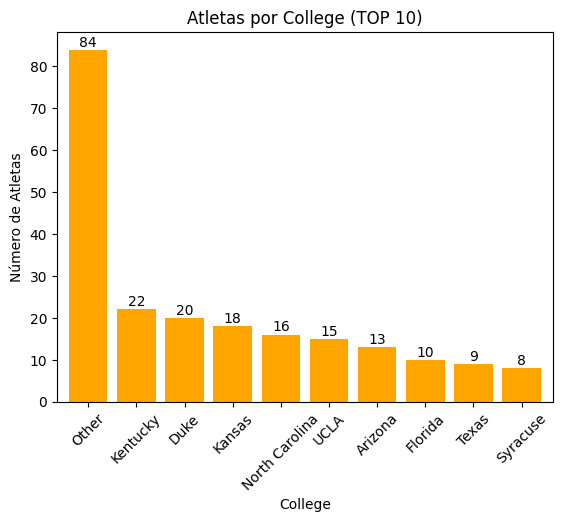

In [56]:
# número de atletas por College (TOP 10)
atletas_college = df_clean.groupby("College").size().sort_values(ascending=False).head(10)
atletas_college.plot(kind="bar", color="orange", rot=45, width=0.8)

# adicionar rótulos de dados
for i, valor in enumerate(atletas_college):
    plt.text(i, valor + 0.1, str(valor), ha='center', va='bottom')

plt.title("Atletas por College (TOP 10)")
plt.ylabel("Número de Atletas")

# ajustar a formatação dos rótulos do eixo y
plt.ticklabel_format(style="plain", axis="y")

plt.show()

Os 18.4% de atletas de origem `Other` como college representa 84 jogadores em números absolutos.

Além dos nomes já citados cálculo acima, temos também North Carolina com 16 atletas, UCLA com 15, Arizona com 13, Florida com 10, Texas com 9 e na décima posição temos Syracuse com 8 atletas.

Sabemos que a NBA formou uma geração ídolos e isso acontece toda temporada, ciente disso, **vamos finalizar nosso projeto** criando uma nuvem de palavras para identificar quais foram os nomes e sobrenomes mais comuns na temporada de 2015-2016. Será que há referências de atletas de outras épocas nos jogadores da temporada 2015-2016?

Para isso vamos utilizar a biblioteca `wordcloud`, após concatenarmos a variável `Name` a bilbioteca calcula as palavras mais ocorridas nesta variável e apresenta através de nuvem de palavras destacando das mais usadas para menos usadas.


In [57]:
# nuvem de palavras Number
!pip install wordcloud -q

In [58]:
# importar biblioteca wordcloud
from wordcloud import WordCloud, ImageColorGenerator

In [59]:
# concatenar as palavras da variável Name
concatenated_names = df_clean["Name"].str.cat(sep=' ')

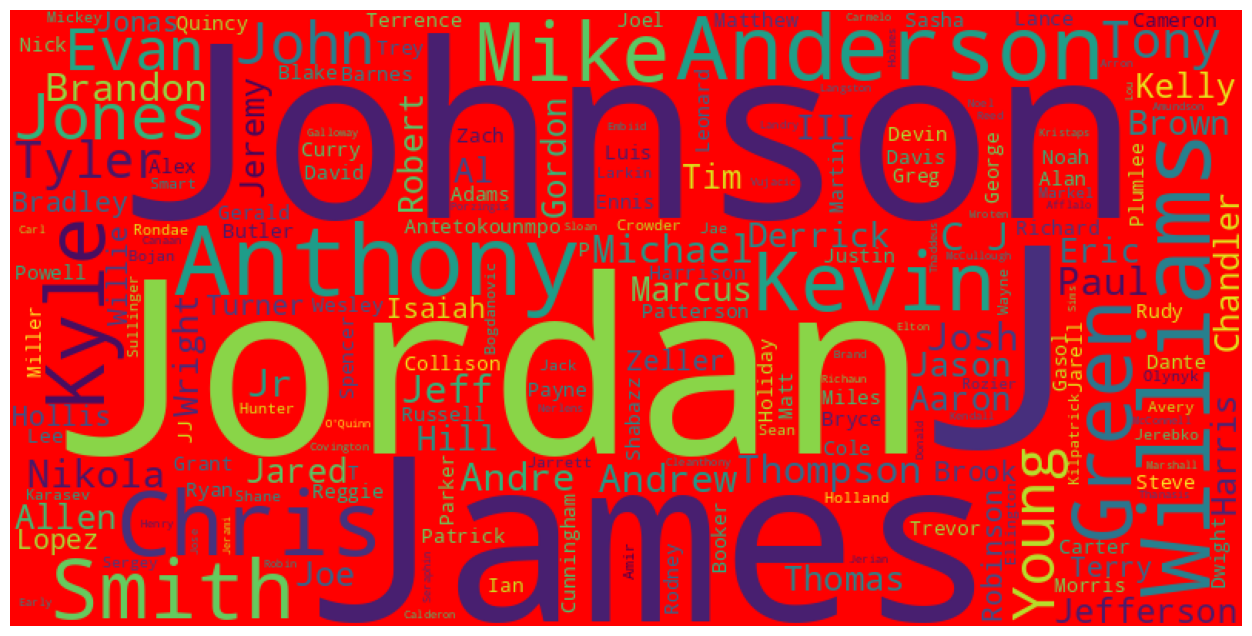

In [60]:
    # Gerar a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color="Red").generate(concatenated_names)

    # Mostrar a imagem final
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_axis_off()

    plt.imshow(wordcloud)

    # salvar arquivo
    wordcloud.to_file("NBANumbers.png")

Em destaque conseguimos ver nomes que mais se apresentam na variável `Name`. São eles: Johnson, Jordan, James, Williams, Antony, Chris, Jones, Kyle e por ai vai.

Entendendo o mercado esportivo americano, dá pra falar que esses nomes ou sobrenomes não são só comuns na NBA, como também em outras ligas esportivas americanas, parecem ser sobrenomes bem comuns nos Estados Unidos.

Mas fica evidente também, que muitos nomes de atletas da temporada 2015-2016 trazem referências de grande ídolos que já estiveram na liga. Como os sobrenomes Jordan e Johnson, referências a Michael Jordan e Magic Johnson atletas que dominaram a NBA em décadas passadas.

Análises encerradas, vamos a conclusão do nosso projeto.

## Conclusão do Projeto

Esse projeto não tem intuito de criar nenhum tipo de modelo ou algo do tipo e sim apenas realizar uma análise descritiva do conteúdo, extrair insights através de estatísticas descritivas e gráficos devidamente escolhidos para apresentação do encontrado.

Além de uma análise quantitativa dos dados, também foi necessário uma anáise qualitativa das informações. Deixarei as referências ao final do notebook.

O intuito foi trabalhar com o máximo das variáveis disponíveis possíveis, todas elas tinham relevância para o projeto, seja ela numérica ou categorica.

Por fim, o notebook além de apresentar os insights encontrados, também tentou de alguma forma explicar os conceitos e métodos utilizados.



### Insights Relevantes

* Identificamos que o Dataset abrange todas as franquias da NBA: 30 no total, foram 457 atletas distruibuídos entre essas 30 franquias, a média de idade deles foi de 26 anos, com o mais novo tendo de 19 anos e o mais velho tendo 40;

* Também identificamos que há uma correlação apesar de fraca positiva entre a altura e peso dos atletas, quanto esses mais altos mais pesado tende ele ser;

* Apesar de fazer sentido que um atleta quanto mais velho mais ele ganha, há também muitos outros atletas veteranos ganhando baixos salários;

* Conseguimos visualizar que um pouco mais de 75% dos atletas da temporada 2015-2016 tinham entre 21 a 30 anos;

* A liga gastou mais de 2 bilhões em salários na temporada 2015-2016 e as franquias que mais ajudaram a inflar esses números foram os Cavaliers, o time onde jogava Lebron James gastou quase 5 milhões em salários na média. Na sequência vem os Hornets e os Wizards com 4 milhões e duzentos e 4 milhões respectivamente.

* O top 3 atletas mais bem pagos da NBA são elas: Kobe Bryant, LeBron James e Carmelho Anthony;

* Há um entendimento que mais de 18% dos atletas na temporada não tem origem em universidades não americanas, portanto, tem como origem universidades estrangeiras;

* A frequência relativa revela que a distribuição de jogadores por posição é bem equilibrada, dos 457 atletas que teve a temporada, próximo de 20% deles são distruibuídos entre as 5 posições;

* Pivô é a posição que maior apresentou média de salários.

* Sobrenomes como **Jordan** e **Johnson**, referências a Michael Jordan e Magic Johnson atletas que dominaram a NBA em décadas passadas apareceram muitas vezes na liga na temporada 2015-2016;

**Combinando esses insights com números de stats e resultados das franquias na temporada, é possível identificar o melhor caminho para montar elencos com um bom custo-benefício e vitoriosos.**

Gostou dessa análise? Espero que sim, deu muito trabalho, mas ao mesmo tempo foi muito divertido passar horas trabalhando nela.

Eu sou o Eric, analista de dados e apaixonado em extrair insights de grandes ou pequenos volumes de dados. Você pode encontrar mais dessas análises em meu
[LinkedIn](https://https://www.linkedin.com/in/ericfruchi/). Fico aberto também para receber qualquer dúvida ou sugestão.

Grande abraço e até a próxima, ainda tem muitos dados por aí.👋

### Referências

* https://en.wikipedia.org/wiki/Rashad_Vaughn
* https://en.wikipedia.org/wiki/Andre_Miller